In [258]:
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import brier_score_loss
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from numpy import mean
from numpy import std
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier

# 1. Loading Data

In [303]:
train = pd.read_excel('~/Downloads/Train_Breast_Cancer.xlsx')
test = pd.read_excel('~/Downloads/Test_Breast_Cancer.xlsx')

In [304]:
train.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [267]:
# encoding the data

oe = OrdinalEncoder()
oe.fit(train)
train2 = oe.transform(train)
#train2 = train2.astype(float)
train2

array([[0., 1., 2., ..., 0., 2., 0.],
       [0., 2., 2., ..., 1., 5., 0.],
       [0., 2., 2., ..., 0., 2., 0.],
       ...,
       [1., 4., 0., ..., 1., 3., 0.],
       [1., 2., 0., ..., 0., 2., 0.],
       [1., 3., 0., ..., 0., 2., 0.]])

In [273]:
columns = ['Class', 'Age', 'Menopause', 'Tumor-size', 'Inv-nodes', 'Node-caps', 'Deg-malig', 'Breast', 'Breast-quad', 'Irradiat']

train2 = pd.DataFrame(train2, columns = columns)
train2

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,0.0,1.0,2.0,5.0,0.0,1.0,2.0,0.0,2.0,0.0
1,0.0,2.0,2.0,3.0,0.0,1.0,1.0,1.0,5.0,0.0
2,0.0,2.0,2.0,3.0,0.0,1.0,1.0,0.0,2.0,0.0
3,0.0,4.0,0.0,2.0,0.0,1.0,1.0,1.0,3.0,0.0
4,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
268,1.0,1.0,2.0,5.0,0.0,1.0,1.0,0.0,3.0,0.0
269,1.0,1.0,2.0,3.0,0.0,1.0,2.0,0.0,3.0,1.0
270,1.0,4.0,0.0,3.0,0.0,1.0,0.0,1.0,3.0,0.0
271,1.0,2.0,0.0,5.0,4.0,1.0,2.0,0.0,2.0,0.0


# 2. Exploratory Data Analysis

# 2.1 Checking Missing Values

In [283]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        273 non-null    object
 1   Age          273 non-null    object
 2   Menopause    273 non-null    object
 3   Tumor-size   273 non-null    object
 4   Inv-nodes    273 non-null    object
 5   Node-caps    273 non-null    object
 6   Deg-malig    273 non-null    int64 
 7   Breast       273 non-null    object
 8   Breast-quad  273 non-null    object
 9   Irradiat     273 non-null    object
dtypes: int64(1), object(9)
memory usage: 21.5+ KB


No Null values in training data

In [253]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class        10 non-null     object 
 1   Age          10 non-null     object 
 2   Menopause    10 non-null     object 
 3   Tumor-size   10 non-null     object 
 4   Inv-nodes    8 non-null      object 
 5   Node-caps    10 non-null     object 
 6   Deg-malig    10 non-null     int64  
 7   Breast       10 non-null     object 
 8   Breast-quad  10 non-null     object 
 9   Irradiat     0 non-null      float64
dtypes: float64(1), int64(1), object(8)
memory usage: 928.0+ bytes


In [254]:
def plot_missing_data(dataset, title):
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title(title)  
    sns.heatmap(dataset.isnull(), cbar=False)

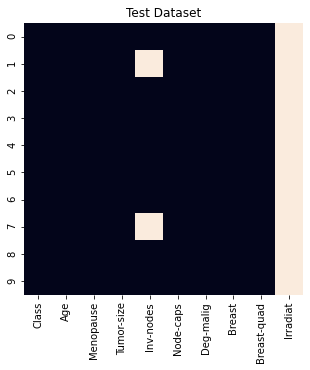

In [259]:
plot_missing_data(test, "Test Dataset")

Other than irradiat column, two null values in the test data, both of them are in Inv-nodes one each in second and eighth rows


In [260]:
# compute percentage of missing values

# compute number of missing records
missing_total = test.isnull().sum().sort_values(ascending=False)

# convert to percentages
missing_percentage = missing_total/test.shape[0]*100

# display missing record %
print('Missing values in test set:')
pd.concat([missing_total,missing_percentage],keys=['Count','Percentage'],axis=1)

Missing values in test set:


,Count,Percentage
Irradiat,10,100.0
Inv-nodes,2,20.0
Class,0,0.0
Age,0,0.0
Menopause,0,0.0
Tumor-size,0,0.0
Node-caps,0,0.0
Deg-malig,0,0.0
Breast,0,0.0
Breast-quad,0,0.0


# 2.2 EDA

In [263]:
def bar_chart(dataset, feature, stacked = True):
    taken = dataset[dataset['Irradiat']=='yes'][feature].value_counts()
    not_taken = dataset[dataset['Irradiat']=='no'][feature].value_counts()
    df_survived_dead = pd.DataFrame([taken,not_taken])
    df_survived_dead.index = ['taken radiation','not taken radiation']
    
    ax = df_survived_dead.plot(kind='bar',stacked=False, figsize=(15,5))
    #y_offset = 15
    # For each patch (basically each rectangle within the bar), add a label.
    for bar in ax.patches:
      ax.text(
          # Put the text in the middle of each bar. get_x returns the start
          # so we add half the width to get to the middle.
          bar.get_x() + bar.get_width() / 2,
          # Vertically, add the height of the bar to the start of the bar,
          # along with the offset.
          bar.get_height() + bar.get_y(), 
          # This is actual value we'll show.
          round(bar.get_height()),
          # Center the labels and style them a bit.
          ha='center',
          color='k',
          weight='bold',
          size=12
      )

no     213
yes     60
Name: Irradiat, dtype: int64
no     0.78022
yes    0.21978
Name: Irradiat, dtype: float64


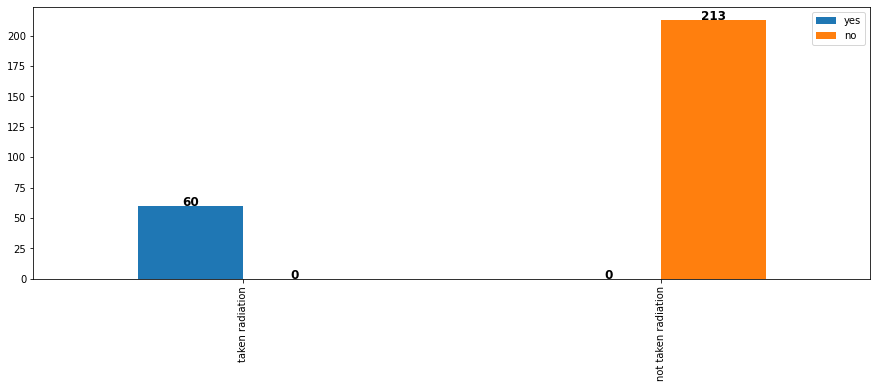

In [265]:
print(train['Irradiat'].value_counts())
print(train['Irradiat'].value_counts(normalize=True))


bar_chart(train, "Irradiat")

it has been observed that 78%, 213 samples haven't taken radiation. 21.9%, 60 samples have taken radiation.
though the data is skewed but not severly imbalanced

                      Class
no-recurrence-events    189
recurrence-events        84
       Irradiat      
           mean count
Class                
0.0    0.153439   189
1.0    0.369048    84


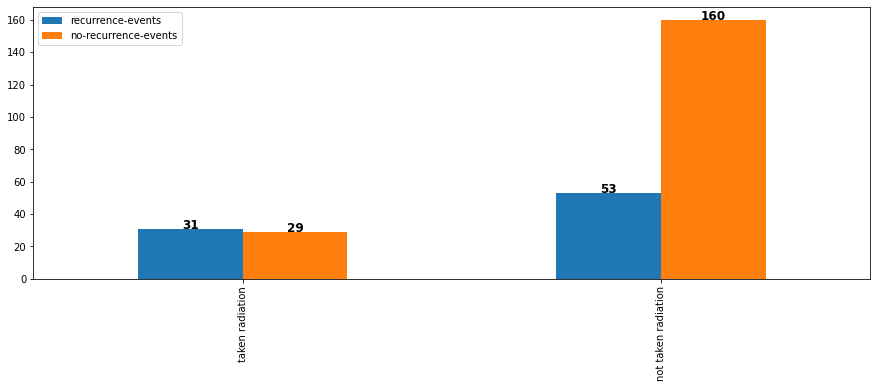

In [305]:
print(train['Class'].value_counts().to_frame())
print(train2[['Class','Irradiat']].groupby(['Class'],as_index=False).agg(['mean','count']))

bar_chart(train, "Class")

it has been observed that 15.34%, 29 samples of no-recurrence events class have  taken radiation. 
36.9%, 29 samples of recurrent events class have taken radiation.

         Menopause
premeno        142
ge40           125
lt40             6
           Irradiat      
               mean count
Menopause                
0.0        0.208000   125
1.0        0.000000     6
2.0        0.239437   142


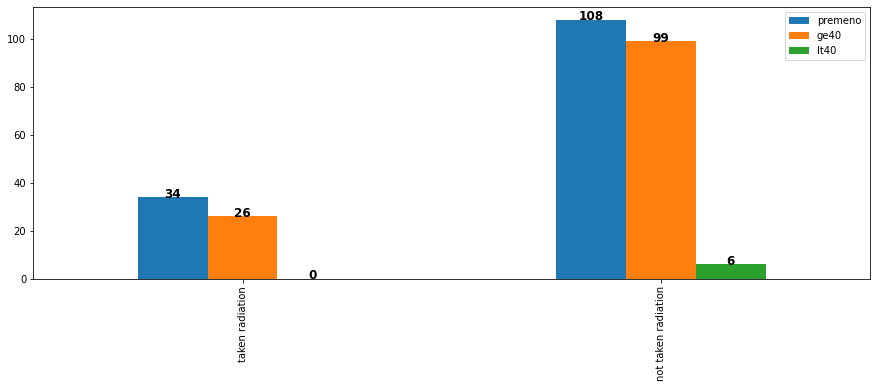

In [310]:
print(train['Menopause'].value_counts().to_frame())
print(train2[['Menopause','Irradiat']].groupby(['Menopause'],as_index=False).agg(['mean','count']))

bar_chart(train, "Menopause")


it has been observed that premeno category has relatively high proportion of samples with radiation, 23.94%.

     Node-caps
no         217
yes         51
?            5
           Irradiat      
               mean count
Node-caps                
0.0        0.800000     5
1.0        0.147465   217
2.0        0.470588    51


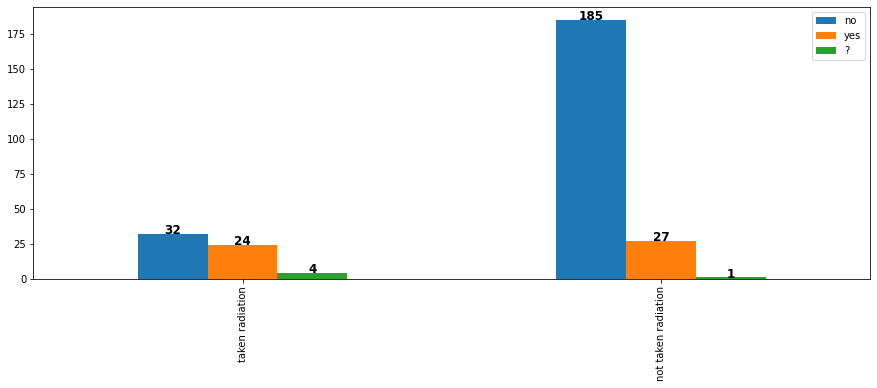

In [329]:
print(train['Node-caps'].value_counts().to_frame())
print(train2[['Node-caps','Irradiat']].groupby(['Node-caps'],as_index=False).agg(['mean','count']))

bar_chart(train, "Node-caps")

there aren't any null values however in 5 rows there exists a special character - '?'
presence of Node caps results in 47%, 24 of radiation samples

In [326]:
def plot_swarm_Irradiat(dataset, feature1, feature2, title, fize = (155)):
    fig, ax = plt.subplots(figsize=(20,8))
    # Turns off grid on the left Axis.
    ax.grid(True)
    plt.xticks(list(range(0,100,2)))
    sns.swarmplot(y=feature1, x=feature2, hue='Irradiat',data=train).set_title(title)

              Class        Irradiat      
               mean count      mean count
Node-caps                                
0.0        0.400000     5  0.800000     5
1.0        0.235023   217  0.147465   217
2.0        0.607843    51  0.470588    51


/Users/ramakrishnareddych/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


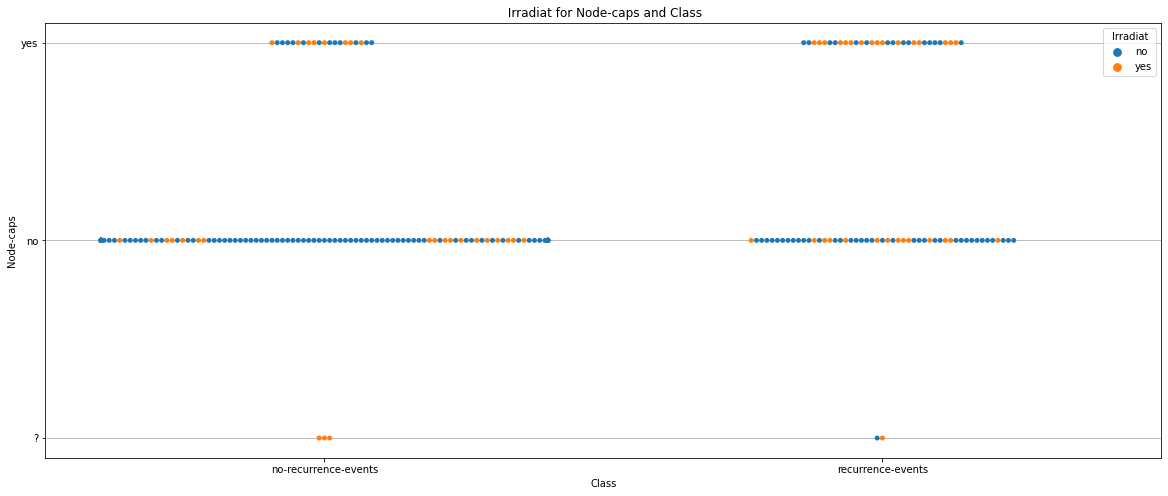

In [330]:
print(train2[['Node-caps','Class', 'Irradiat']].groupby(['Node-caps'],as_index=False).agg(['mean','count']))

plot_swarm_Irradiat(train, 'Node-caps', "Class", " Irradiat for Node-caps and Class")


it has been observed that 60.7% of the samples are having are having node caps and recurrent class

   Deg-malig
2        123
3         81
1         69
           Irradiat      
               mean count
Deg-malig                
0.0        0.086957    69
1.0        0.227642   123
2.0        0.320988    81


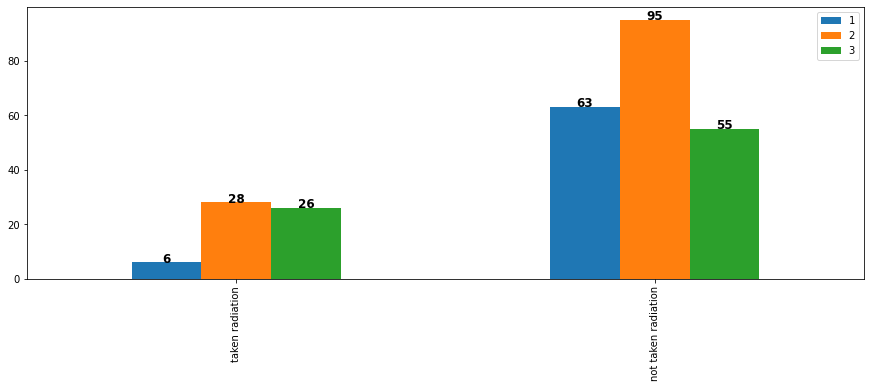

In [314]:
print(train['Deg-malig'].value_counts().to_frame())
print(train2[['Deg-malig','Irradiat']].groupby(['Deg-malig'],as_index=False).agg(['mean','count']))

bar_chart(train, "Deg-malig")

it has been observed that samples with radiation taken are directly proportional to degree of malignanacy

          Node-caps        Irradiat      
               mean count      mean count
Deg-malig                                
0.0        0.956522    69  0.086957    69
1.0        1.170732   123  0.227642   123
2.0        1.345679    81  0.320988    81


/Users/ramakrishnareddych/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 68.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ramakrishnareddych/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


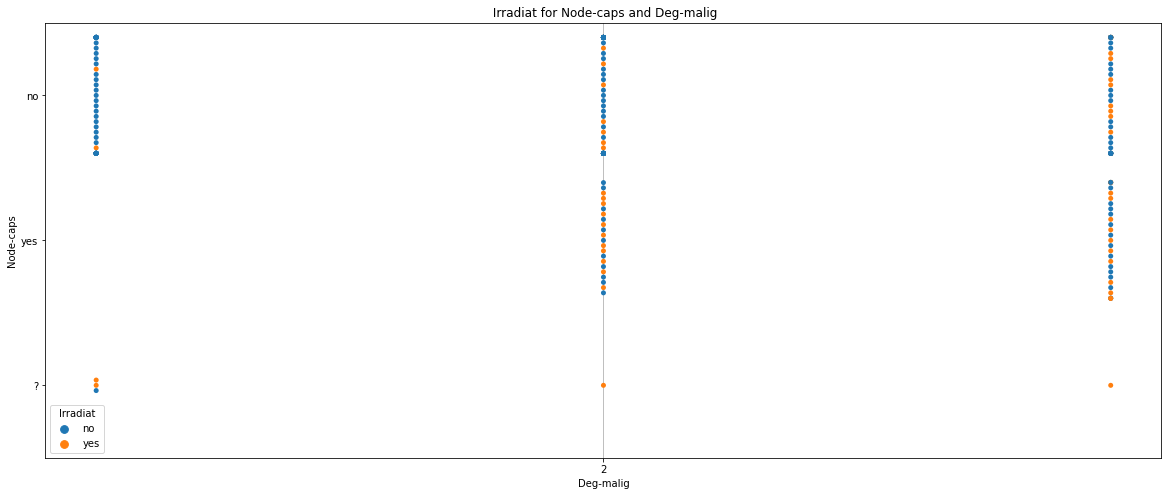

In [332]:

plot_swarm_Irradiat(train, 'Node-caps', "Deg-malig", " Irradiat for Node-caps and Deg-malig")

it has been observed that with the presence of Node-caps and degree of malignancy greather than or equal to 2 increases chances to take radiation. 
even without the presence of Node-caps there are relatively higher chances for radiation at degree of malignency = 3

       Breast
left      146
right     127
        Irradiat      
            mean count
Breast                
0.0     0.226027   146
1.0     0.212598   127


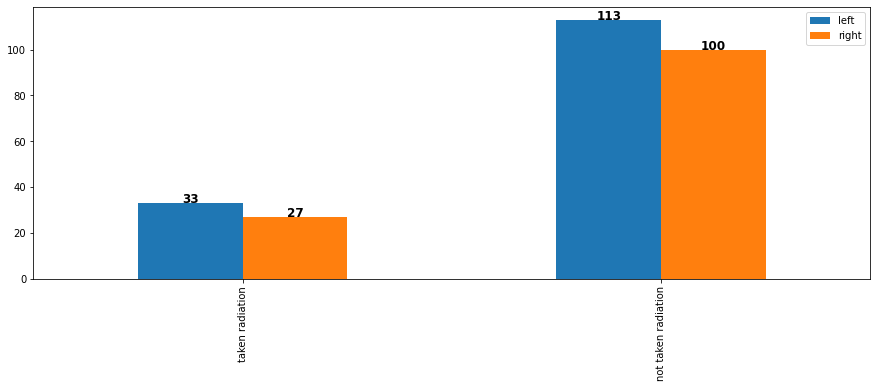

In [317]:
print(train['Breast'].value_counts().to_frame())
print(train2[['Breast','Irradiat']].groupby(['Breast'],as_index=False).agg(['mean','count']))

bar_chart(train, "Breast")

the chances to under go radiation are similar for the breast side i.e either left or right in which the cancer grows. however their relative percentages of taking radiation are 22.6% and 21.2 for left and right sides respectively.

           Breast-quad
left_low           109
left_up             89
right_up            30
right_low           24
central             20
?                    1
             Irradiat      
                 mean count
Breast-quad                
0.0          0.000000     1
1.0          0.100000    20
2.0          0.247706   109
3.0          0.224719    89
4.0          0.291667    24
5.0          0.133333    30


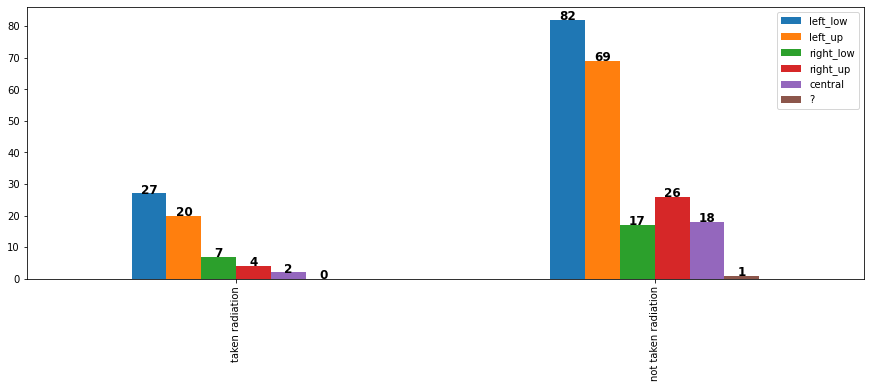

In [318]:
print(train['Breast-quad'].value_counts().to_frame())
print(train2[['Breast-quad','Irradiat']].groupby(['Breast-quad'],as_index=False).agg(['mean','count']))

bar_chart(train, "Breast-quad")

it has been observed that cancer generated on lower side of lungs are having higher proportions of radiation taken.
right low - 29.16% and left low 24.77% of radiation samples

/Users/ramakrishnareddych/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ramakrishnareddych/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 51.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


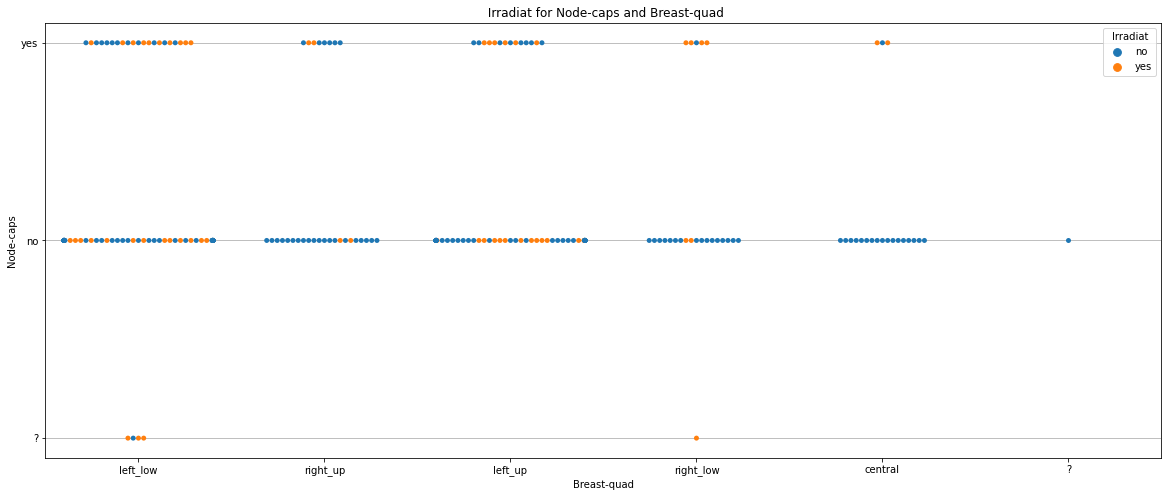

In [319]:

plot_swarm_Irradiat(train, 'Node-caps', "Breast-quad", " Irradiat for Node-caps and Breast-quad")

its inconclusive from the above graph why the cancer on the lower end of the lung results in more radiation samples

/Users/ramakrishnareddych/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ramakrishnareddych/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


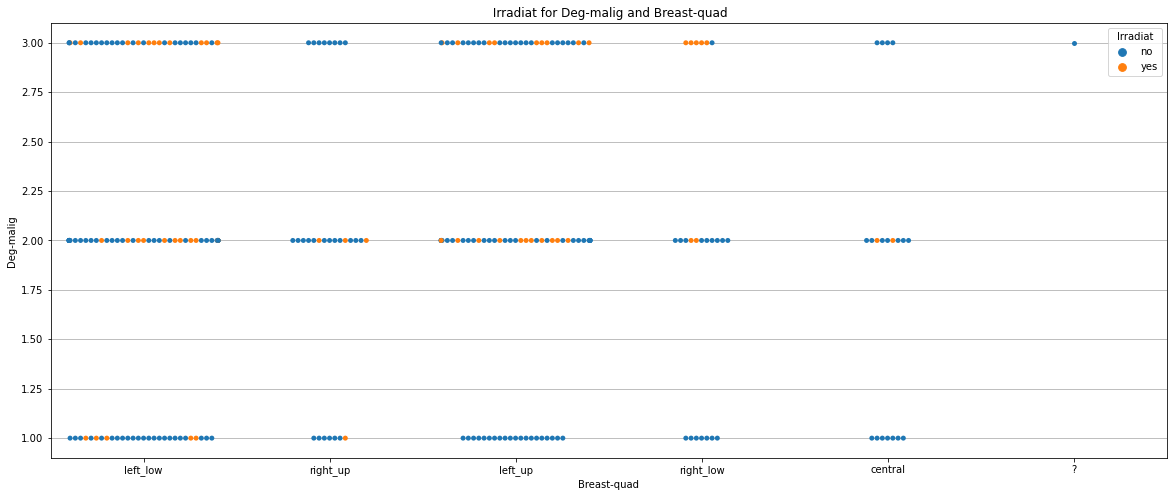

In [321]:
plot_swarm_Irradiat(train, 'Deg-malig', "Breast-quad", " Irradiat for Deg-malig and Breast-quad")

it has been observed that higher dergree of malignancy found in the lower part of lungs hence cancer generated on lower side of lungs are having higher proportions of radiation taken.

In [ ]:
def plot_distribution(dataset, feature, title, bins = 30, hist = True, fsize = (5,5)):
    fig, ax = plt.subplots(figsize=fsize)
    ax.set_title(title)
    sns.distplot(train2[feature], color='g', bins=bins, ax=ax)

In [308]:
def plot_kernel_density_estimate(dataset, feature1, title, fsize = (10,5)):
    fig, ax = plt.subplots(figsize=fsize)
    ax.set_title(title) 
    sns.kdeplot(dataset[feature1].loc[train2["Irradiat"] == 1],
                shade= True, ax=ax, label='taken radiation').set_xlabel(feature1)
    sns.kdeplot(dataset[feature1].loc[train2["Irradiat"] == 0],
                shade=True, ax=ax, label="not taken radiation").set_xlabel(feature1)
    plt.legend()

       Age
50-59   92
40-49   86
60-69   55
30-39   33
70-79    6
20-29    1
     Irradiat      
         mean count
Age                
0.0  0.000000     1
1.0  0.242424    33
2.0  0.267442    86
3.0  0.152174    92
4.0  0.254545    55
5.0  0.166667     6


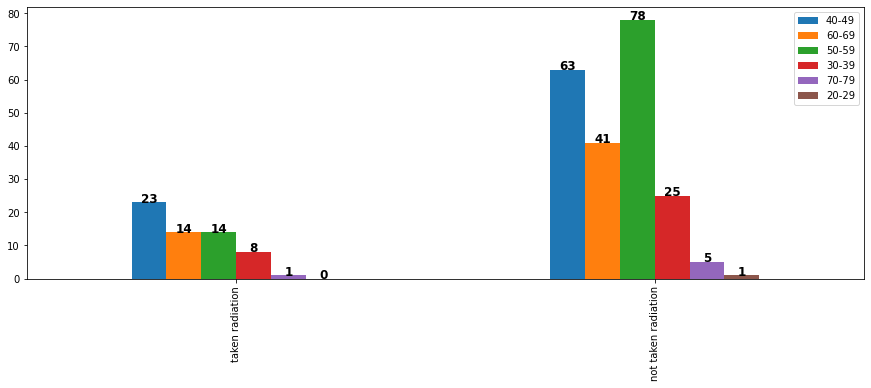

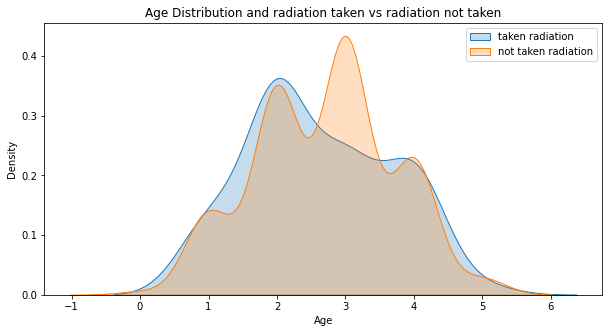

In [309]:
print(train['Age'].value_counts().to_frame())
print(train2[['Age','Irradiat']].groupby(['Age'],as_index=False).agg(['mean','count']))

bar_chart(train, "Age")
plot_kernel_density_estimate(train2, "Age", "Age Distribution and radiation taken vs radiation not taken")

it has been observed that people from age groups 30-39 and 40-49 have high proportion of sample with radiation
age group - 50-59 is having low proprtion of samples with radiation

/Users/ramakrishnareddych/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


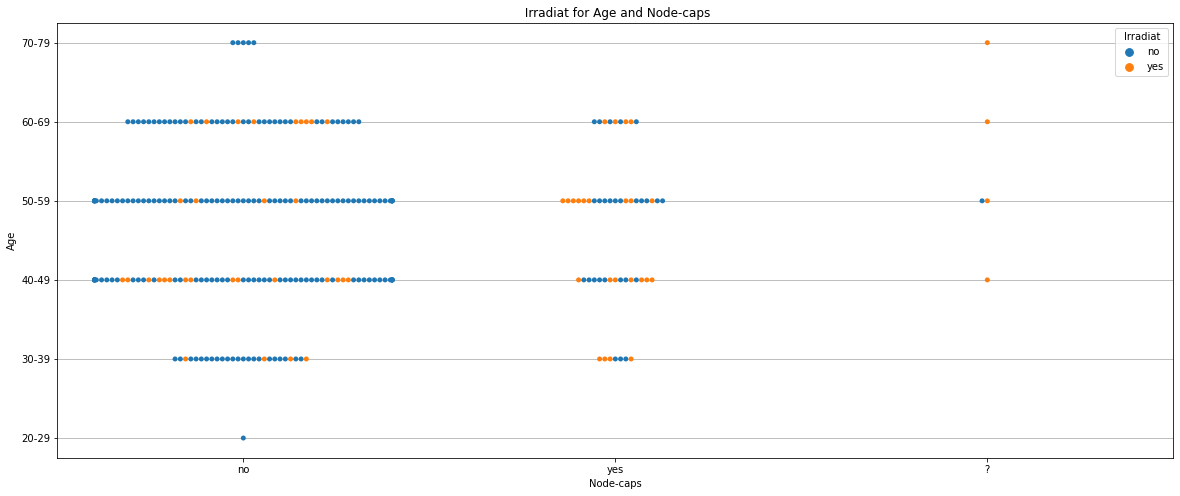

In [335]:
plot_swarm_Irradiat(train, 'Age', "Node-caps", " Irradiat for Age and Node-caps")

/Users/ramakrishnareddych/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ramakrishnareddych/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ramakrishnareddych/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ramakrishnareddych/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 64.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


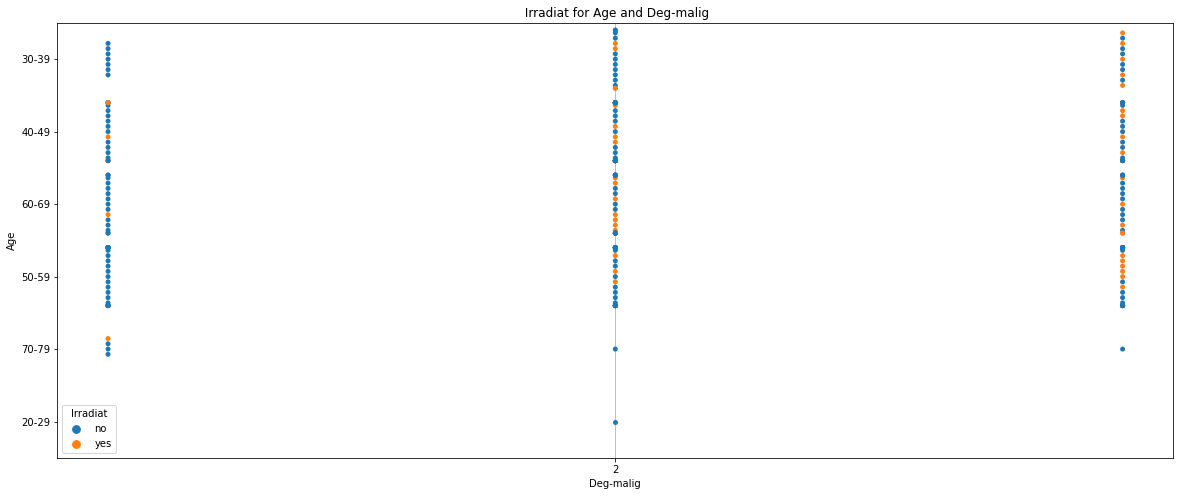

In [324]:
plot_swarm_Irradiat(train, 'Age', "Deg-malig", " Irradiat for Age and Deg-malig")

       Tumor-size
30-34          57
25-29          51
20-24          48
15-19          30
10-14          28
40-44          19
35-39          17
50-54           8
0-4             8
5-9             4
45-49           3
            Irradiat      
                mean count
Tumor-size                
0.0         0.000000     8
1.0         0.107143    28
2.0         0.200000    30
3.0         0.187500    48
4.0         0.294118    51
5.0         0.245614    57
6.0         0.117647    17
7.0         0.263158    19
8.0         0.666667     3
9.0         0.250000     4
10.0        0.375000     8


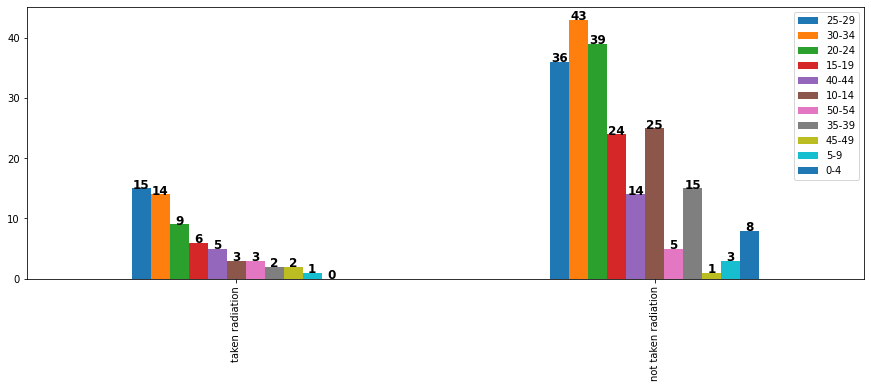

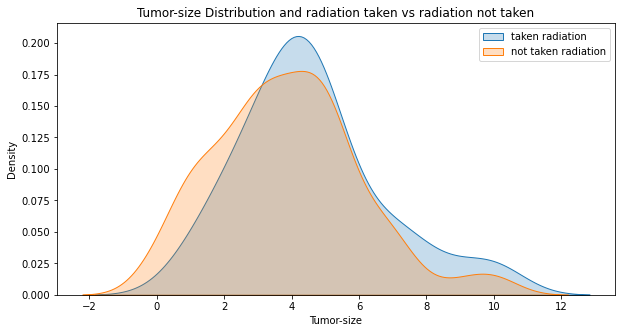

In [338]:
print(train['Tumor-size'].value_counts().to_frame())
print(train2[['Tumor-size','Irradiat']].groupby(['Tumor-size'],as_index=False).agg(['mean','count']))

bar_chart(train, "Tumor-size")

plot_kernel_density_estimate(train2, "Tumor-size", "Tumor-size Distribution and radiation taken vs radiation not taken")

it has been observed that tumor sizes of 25-29 and above are having high proprtion of radiation taken
on the other hand tumor size below 25-29 are having lower proportion of radiation taken

/Users/ramakrishnareddych/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 63.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ramakrishnareddych/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ramakrishnareddych/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ramakrishnareddych/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Use

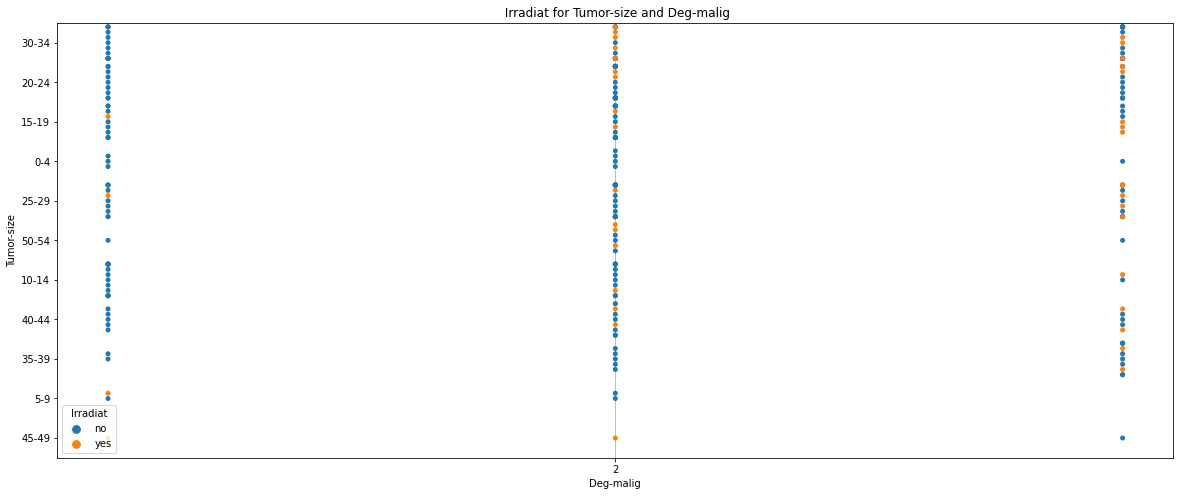

In [339]:
plot_swarm_Irradiat(train, 'Tumor-size', "Deg-malig", " Irradiat for Tumor-size and Deg-malig")

it has been observed that tumor size greater than 25-29 are having higher degree of malignancy greater than equal to 2

       Inv-nodes
0-2          209
3-5           32
6-8           15
9-11           7
15-17          6
12-14          3
24-26          1
           Irradiat      
               mean count
Inv-nodes                
0.0        0.138756   209
1.0        1.000000     3
2.0        0.166667     6
3.0        1.000000     1
4.0        0.437500    32
5.0        0.533333    15
6.0        0.571429     7


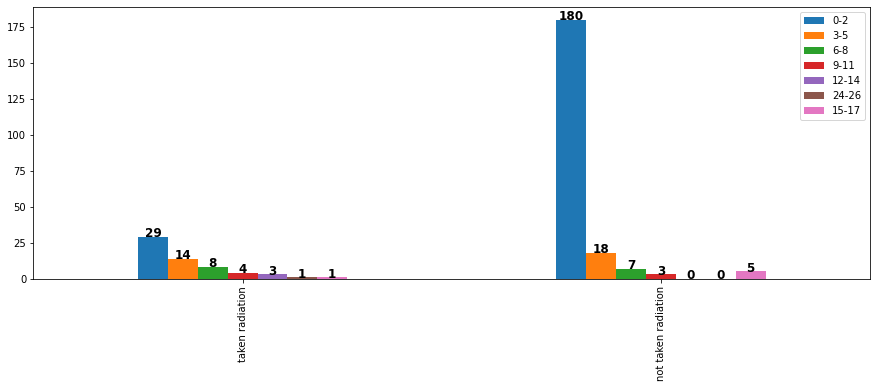

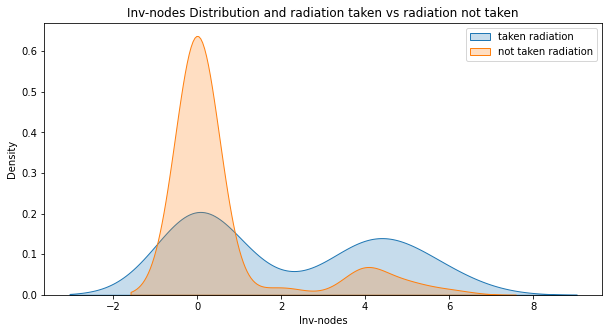

In [341]:
print(train['Inv-nodes'].value_counts().to_frame())
print(train2[['Inv-nodes','Irradiat']].groupby(['Inv-nodes'],as_index=False).agg(['mean','count']))

bar_chart(train, "Inv-nodes")


plot_kernel_density_estimate(train2, "Inv-nodes", "Inv-nodes Distribution and radiation taken vs radiation not taken")

it has been observed that greater the presence of inv nodes higher the proprtion of radiation taken

# 3. Test train split and Encoding Categorial variables

In [182]:
# split into input and output variables
X = train.iloc[:, :-1]
y = train.iloc[:,-1]
X_test = test.iloc[:, :-1]

In [7]:
# format all fields as string
X = X.astype(str)

In [18]:
# encoding features

oe = OrdinalEncoder()
oe.fit(X)
X_enc = oe.transform(X)
X_enc

array([[0., 1., 2., ..., 2., 0., 2.],
       [0., 2., 2., ..., 1., 1., 5.],
       [0., 2., 2., ..., 1., 0., 2.],
       ...,
       [1., 4., 0., ..., 0., 1., 3.],
       [1., 2., 0., ..., 2., 0., 2.],
       [1., 3., 0., ..., 2., 0., 2.]])

In [125]:
# encoding lables

y_enc = LabelEncoder().fit_transform(y)
y_enc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0])

In [44]:
X_enc = X_enc.astype(float)


In [52]:

columns = ['Class', 'Age', 'Menopause', 'Tumor-size', 'Inv-nodes', 'Node-caps', 'Deg-malig', 'Breast', 'Breast-quad']

xpd = pd.DataFrame(X_enc, columns = columns)
xpd

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad
0,0.0,1.0,2.0,5.0,0.0,1.0,2.0,0.0,2.0
1,0.0,2.0,2.0,3.0,0.0,1.0,1.0,1.0,5.0
2,0.0,2.0,2.0,3.0,0.0,1.0,1.0,0.0,2.0
3,0.0,4.0,0.0,2.0,0.0,1.0,1.0,1.0,3.0
4,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...
268,1.0,1.0,2.0,5.0,0.0,1.0,1.0,0.0,3.0
269,1.0,1.0,2.0,3.0,0.0,1.0,2.0,0.0,3.0
270,1.0,4.0,0.0,3.0,0.0,1.0,0.0,1.0,3.0
271,1.0,2.0,0.0,5.0,4.0,1.0,2.0,0.0,2.0


# Categorical Feature Selection

Chi-Squared Feature Selection

Feature 0: 10.914495
Feature 1: 0.106827
Feature 2: 0.365576
Feature 3: 5.836972
Feature 4: 109.266170
Feature 5: 1.788158
Feature 6: 6.168520
Feature 7: 0.038200
Feature 8: 0.008642


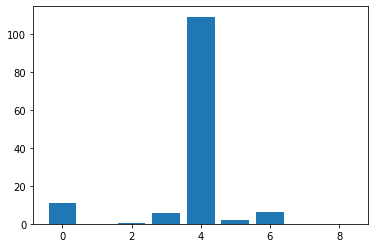

In [206]:
fs = SelectKBest(score_func=chi2, k='all') 
fs.fit(xpd, y_enc)
X_enc_ch = fs.transform(X_enc) 


# Scores for the features - Chi-Squared Feature Selection
for i in range(len(fs.scores_)): print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Mutual Information Feature Selection

Feature 0: 0.019176
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.015117
Feature 4: 0.039521
Feature 5: 0.038424
Feature 6: 0.046224
Feature 7: 0.000000
Feature 8: 0.000000


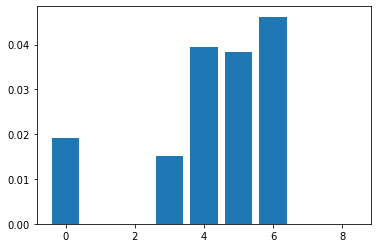

In [134]:
# feature selection
seed =2


fs_mi = SelectKBest(score_func=mutual_info_classif, k='all') 
fs_mi.fit(xpd, y_enc)
X_enc_mi = fs.transform(X_enc)
#X_test_fs = fs.transform(X_test)
# Scores for the features - Mutual Information Feature Selection
for i in range(len(fs_mi.scores_)): 
    print('Feature %d: %f' % (i, fs_mi.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs_mi.scores_))], fs_mi.scores_)
pyplot.show()

#owing to the stochastic nature of the classifier the results may vary

In [131]:
xpd_fs = xpd.drop(['Age', 'Menopause', 'Breast', 'Breast-quad'], axis = 1)
xpd_fs.head()

,Class,Tumor-size,Inv-nodes,Node-caps,Deg-malig
0,0.0,5.0,0.0,1.0,2.0
1,0.0,3.0,0.0,1.0,1.0
2,0.0,3.0,0.0,1.0,1.0
3,0.0,2.0,0.0,1.0,1.0
4,0.0,0.0,0.0,1.0,1.0


# 4.Model

In [132]:
# calculate reference brier score


ref_probs = [0.21978 for _ in range(len(y_enc))]
bs_ref = brier_score_loss(y_enc, ref_probs)
bs_ref

0.1714768747736264

Given that we are interested in predicting a probability of Radiation taken, we need a performance metric that evaluates the skill of a model based on the predicted probabilities. In this case, we will use the Brier score that calculates the mean squared error between the predicted probabilities and the expected probabilities. This can be calculated using the brier score loss() scikit-learn function. This score is minimized, with a perfect score of 0.0. We can invert the score to be maximizing by comparing a predicted score to a reference score, showing how much better the model is compared to the reference between 0.0 for the same, to 1.0 with perfect skill. Any models that achieve a score less than 0.0 represents less skill than the reference model. This is called the Brier Skill Score, or BSS for short.

In [137]:
# calculate brier skill score (BSS)
def brier_skill_score(y_enc, y_prob = 0.21978):
  # calculate reference brier score
    #pos_prob = count_nonzero(y_enc) / len(y_enc)
    ref_probs = [0.21978 for _ in range(len(y_enc))]
    bs_ref = brier_score_loss(y_enc, ref_probs)
  # calculate model brier score
    bs_model = brier_score_loss(y_enc, y_prob)
  # calculate skill score
    return 1.0 - (bs_model / bs_ref)

First, we need a Brier score for a reference prediction. A reference prediction for a problem in which we are predicting probabilities is the probability of the positive class label in the dataset. In this case, the positive class label represents radiation taken and occurs about 21.978% in the dataset. Therefore, predicting about 0.21978 represents the worst-case or baseline performance for a predictive model on this dataset. Any model that has a Brier score better than this has some skill, where as any model that as a Brier score lower than this has no skill. The Brier Skill Score captures this important relationship. 

In [138]:
# define the model evaluation the metric


metric = make_scorer(brier_skill_score, needs_proba=True)


we can make use of the brier skill score() function to evaluate a model using repeated stratified k-fold cross-validation.To ensure that models were evaluated on probabilities instead of class labels, a custom metric based on make scorer () function from scikit-learn was used. It creates a score for the predict probs () function of different models.

In [139]:
# evaluate a model



def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # define the model evaluation the metric
  metric = make_scorer(brier_skill_score, needs_proba=True)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores


the baseline strategy of predicting the distribution of positive examples in the training set as the probability of each case in the test set. This can be implemented automatically using the DummyClassifier class and setting the strategy to
‘prior’ that will predict the prior probability of each class in the training dataset, which for the positive class we know is about 0.21978.

In [140]:
# define the reference model



model = DummyClassifier(strategy='prior')

We would expect the baseline model to achieve a BSS of 0.0, e.g. the same as the reference model because it is the reference model.

# 5. Evaluation

evaluate a suite of models that are known to be effective at predicting probabilities. Specifically, these are models that are fit under a probabilistic framework and explicitly predict a calibrated probability for each example.
compare each algorithm based on the mean score, as well as based on their distribution of scores.

In [141]:
# evaluate the model


print(X_enc.shape, y_enc.shape, Counter(y_enc))
scores = evaluate_model(X_enc, y_enc, model)
# summarize performance
print('Mean BSS: %.3f (%.3f)' % (mean(scores), std(scores)))

(273, 9) (273,) Counter({0: 213, 1: 60})
Mean BSS: -0.000 (0.000)


In [148]:
# define models to test



def get_models():
    models, names = list(), list()
    # LR 
    models.append(LogisticRegression(solver='lbfgs')) 
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis()) 
    names.append('LDA')
    # QDA 
    models.append(QuadraticDiscriminantAnalysis()) 
    names.append('QDA')
    # GNB
    models.append(GaussianNB())
    names.append('GNB')
    # MNB
    models.append(MultinomialNB()) 
    names.append('MNB')
    # GPC
    models.append(GaussianProcessClassifier()) 
    names.append('GPC')
    return models, names

>LR 0.070 (0.157)
>LDA 0.053 (0.194)
>QDA -0.059 (0.335)
>GNB -0.094 (0.346)
>MNB -0.102 (0.322)
>GPC -0.062 (0.072)


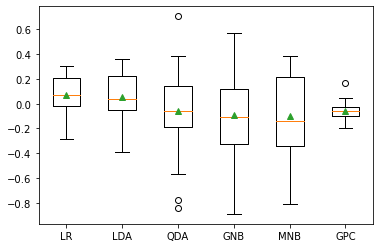

In [151]:
# evaluating the performance of the models on the entire data set

models, names = get_models()

results = list()
# evaluate each model
for i in range(len(models)):
  # evaluate the model and store results
    scores = evaluate_model(X_enc, y_enc, models[i])
    results.append(scores)
# summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Among the 6 classifiers tested, namely- logistic regression, Linear Discriminant Analysis, Quadratic Discriminant Analysis, Gaussian Naive Bayes, Multinomial Naive Bayes and Gaussian Process Classifier, only two namely - Logistic Regression and Linnear Discriminant Analysis have shown better skill.  

>LR 0.090 (0.145)
>LDA 0.072 (0.185)
>QDA -0.019 (0.341)
>GNB -0.094 (0.341)
>MNB -0.038 (0.287)
>GPC 0.104 (0.113)


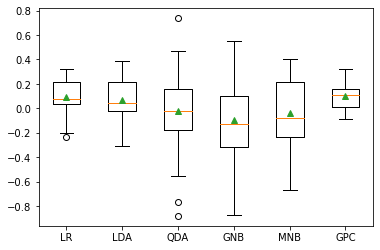

In [153]:
# evaluating the performance of the models on the feature selected data set

models, names = get_models()

results = list()
# evaluate each model
for i in range(len(models)):
  # evaluate the model and store results
    scores = evaluate_model(xpd_fs, y_enc, models[i])
    results.append(scores)
# summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

To improve the performance of the models, this time the models were were tested on feature sampled data obtained from chi  squared feature selection. Method. The performance on feature sampled data was better than earlier. Besides, Gaussian Process Classifier now has a positive skill and out performed Linear regression.


# 6. Test Data

In [183]:
X_test['Inv-nodes'].describe()

count       8
unique      4
top       3-5
freq        3
Name: Inv-nodes, dtype: object

In [184]:
#imputing the missing values in the test data with most frequent (mode) categorical value

top = '3-5'
X_test['Inv-nodes'] = X_test['Inv-nodes'].fillna(top)
X_test

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad
0,no-recurrence-events,30-39,premeno,25-29,6-8,yes,2,right,left_up
1,no-recurrence-events,50-59,premeno,25-29,3-5,yes,2,left,left_up
2,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,left_up
3,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,right_up
4,no-recurrence-events,40-49,premeno,40-44,3-5,yes,3,right,left_up
5,no-recurrence-events,40-49,premeno,30-34,6-8,no,2,left,left_up
6,no-recurrence-events,50-59,ge40,40-44,0-2,no,3,left,right_up
7,no-recurrence-events,60-69,ge40,30-34,3-5,no,2,left,left_low
8,no-recurrence-events,30-39,premeno,20-24,3-5,no,2,right,central
9,no-recurrence-events,30-39,premeno,40-44,3-5,no,3,right,right_up


In [185]:
#ordinal encoding the test data

X_test_enc = oe.transform(X_test)
X_test_enc

array([[0., 1., 2., 4., 5., 2., 1., 1., 3.],
       [0., 3., 2., 4., 4., 2., 1., 0., 3.],
       [0., 2., 2., 6., 6., 2., 1., 1., 3.],
       [0., 2., 2., 6., 6., 2., 1., 1., 5.],
       [0., 2., 2., 7., 4., 2., 2., 1., 3.],
       [0., 2., 2., 5., 5., 1., 1., 0., 3.],
       [0., 3., 0., 7., 0., 1., 2., 0., 5.],
       [0., 4., 0., 5., 4., 1., 1., 0., 2.],
       [0., 1., 2., 3., 4., 1., 1., 1., 1.],
       [0., 1., 2., 7., 4., 1., 2., 1., 5.]])

Based on the models performance in evaluation, Three models were build -  Logistic regression  with and without feature selection and Gaussian Process Classifier with feature selection.

In [242]:
#logistic regression trained on the entire data set

model = LogisticRegression(solver='lbfgs')
model.fit(X_enc, y_enc)

LogisticRegression()

In [243]:
plr_c = []

for i in X_test_enc:
    # make prediction
    yhat = model.predict_proba([i])
    # get percentage to take radiatiaon
    p_to_take_radiation = yhat[0, 0] * 100
    plr_c.append(p_to_take_radiation)
    # summarize
    print('data=%s, to take radiation=%.3f%%' % (i, p_to_take_radiation))


data=[0. 1. 2. 4. 5. 2. 1. 1. 3.], to take radiation=59.425%
data=[0. 3. 2. 4. 4. 2. 1. 0. 3.], to take radiation=61.900%
data=[0. 2. 2. 6. 6. 2. 1. 1. 3.], to take radiation=43.084%
data=[0. 2. 2. 6. 6. 2. 1. 1. 5.], to take radiation=46.287%
data=[0. 2. 2. 7. 4. 2. 2. 1. 3.], to take radiation=46.150%
data=[0. 2. 2. 5. 5. 1. 1. 0. 3.], to take radiation=52.121%
data=[0. 3. 0. 7. 0. 1. 2. 0. 5.], to take radiation=83.045%
data=[0. 4. 0. 5. 4. 1. 1. 0. 2.], to take radiation=65.447%
data=[0. 1. 2. 3. 4. 1. 1. 1. 1.], to take radiation=64.330%
data=[0. 1. 2. 7. 4. 1. 2. 1. 5.], to take radiation=50.073%


In [232]:
# selecting the features based on chi square feature selection



xpd_test = pd.DataFrame(X_test_enc, columns = columns)

xpd_test_fs = xpd_test.drop(['Age', 'Menopause', 'Breast', 'Breast-quad'], axis = 1)
xpd_test_fs = xpd_test_fs.values.tolist()
xpd_test_fs

[[0.0, 4.0, 5.0, 2.0, 1.0],
 [0.0, 4.0, 4.0, 2.0, 1.0],
 [0.0, 6.0, 6.0, 2.0, 1.0],
 [0.0, 6.0, 6.0, 2.0, 1.0],
 [0.0, 7.0, 4.0, 2.0, 2.0],
 [0.0, 5.0, 5.0, 1.0, 1.0],
 [0.0, 7.0, 0.0, 1.0, 2.0],
 [0.0, 5.0, 4.0, 1.0, 1.0],
 [0.0, 3.0, 4.0, 1.0, 1.0],
 [0.0, 7.0, 4.0, 1.0, 2.0]]

In [244]:
#logistic regression trained on the feature selected data set

model = LogisticRegression(solver='lbfgs')
model.fit(xpd_fs, y_enc)

LogisticRegression()

In [245]:
plr_fs = []

for i in xpd_test_fs:
    # make prediction
    yhat = model.predict_proba([i])
    # get percentage to take radiatiaon
    p_to_take_radiation = yhat[0, 0] * 100
    plr_fs.append(p_to_take_radiation)
    # summarize
    print('data=%s, to take radiation=%.3f%%' % (i, p_to_take_radiation))


data=[0.0, 4.0, 5.0, 2.0, 1.0], to take radiation=61.057%
data=[0.0, 4.0, 4.0, 2.0, 1.0], to take radiation=67.926%
data=[0.0, 6.0, 6.0, 2.0, 1.0], to take radiation=48.411%
data=[0.0, 6.0, 6.0, 2.0, 1.0], to take radiation=48.411%
data=[0.0, 7.0, 4.0, 2.0, 2.0], to take radiation=52.207%
data=[0.0, 5.0, 5.0, 1.0, 1.0], to take radiation=57.067%
data=[0.0, 7.0, 0.0, 1.0, 2.0], to take radiation=77.418%
data=[0.0, 5.0, 4.0, 1.0, 1.0], to take radiation=64.227%
data=[0.0, 3.0, 4.0, 1.0, 1.0], to take radiation=68.953%
data=[0.0, 7.0, 4.0, 1.0, 2.0], to take radiation=50.738%


In [246]:
#Gaussian Process Classifier trained on the feature selected data set

model = GaussianProcessClassifier()
model.fit(xpd_fs, y_enc)

GaussianProcessClassifier()

In [247]:
gpc_fs = []

for i in xpd_test_fs:
    # make prediction
    yhat = model.predict_proba([i])
    # get percentage to take radiatiaon
    p_to_take_radiation = yhat[0, 0] * 100
    gpc_fs.append(p_to_take_radiation)
    # summarize
    print('data=%s, to take radiation=%.3f%%' % (i, p_to_take_radiation))

data=[0.0, 4.0, 5.0, 2.0, 1.0], to take radiation=52.263%
data=[0.0, 4.0, 4.0, 2.0, 1.0], to take radiation=50.220%
data=[0.0, 6.0, 6.0, 2.0, 1.0], to take radiation=56.020%
data=[0.0, 6.0, 6.0, 2.0, 1.0], to take radiation=56.020%
data=[0.0, 7.0, 4.0, 2.0, 2.0], to take radiation=57.685%
data=[0.0, 5.0, 5.0, 1.0, 1.0], to take radiation=54.375%
data=[0.0, 7.0, 0.0, 1.0, 2.0], to take radiation=71.091%
data=[0.0, 5.0, 4.0, 1.0, 1.0], to take radiation=55.952%
data=[0.0, 3.0, 4.0, 1.0, 1.0], to take radiation=53.003%
data=[0.0, 7.0, 4.0, 1.0, 2.0], to take radiation=51.723%


In [248]:
results = pd.DataFrame()
results['Logistic_Reg'] = plr_c
results['Logistic_Reg_fs'] = plr_fs
results['Gausian_Process_clasif'] = gpc_fs
results

,Logistic_Reg,Logistic_Reg_fs,Gausian_Process_clasif
0,59.424830,61.057468,52.263460
1,61.900435,67.925989,50.219684
2,43.084333,48.410513,56.019702
3,46.287298,48.410513,56.019702
4,46.149851,52.206531,57.684829
5,52.121157,57.066792,54.374742
6,83.045373,77.418345,71.090704
7,65.446530,64.226784,55.951809
8,64.329558,68.952641,53.002956
9,50.072782,50.737684,51.723221


In [250]:
results.to_csv('~/Downloads/results.csv')